In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 

In [5]:
df=pd.read_csv(r"C:\Users\sanik\Downloads\gold prices - gold prices.csv")
df

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7
...,...,...,...,...,...,...
2534,08/23/2013,1395.8,149116.0,1376.1,1399.9,1367.8
2535,08/22/2013,1370.8,134493.0,1365.6,1381.4,1354.5
2536,08/21/2013,1370.1,137350.0,1371.0,1378.9,1359.2
2537,08/20/2013,1372.6,130096.0,1364.9,1378.0,1351.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2511 non-null   float64
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.1+ KB


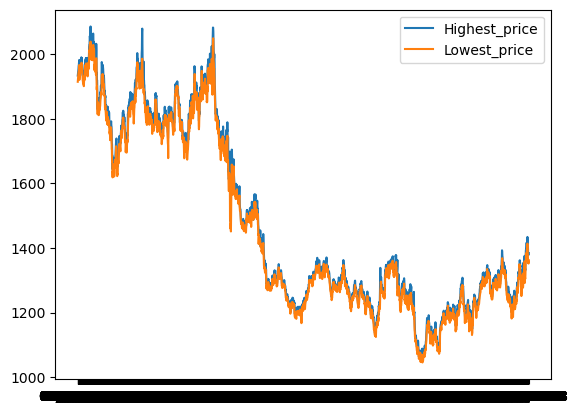

In [7]:
# compare the highest and lowest price columns
dates = df['Date']
Highest_price = df['High']
Lowest_price = df['Low']

plt.plot(dates, Highest_price,label="Highest_price")
plt.plot(dates, Lowest_price,label="Lowest_price")
plt.legend()
plt.show()

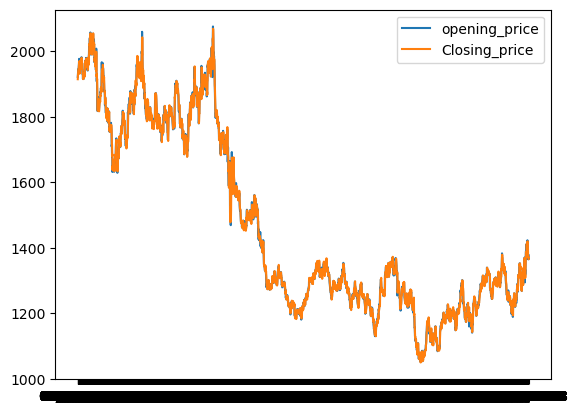

In [8]:
#Compare the open and close price of the stock
dates = df['Date']
Opening_price = df['Open']
Closing_price = df['Close/Last']

plt.plot(dates, Opening_price,label="opening_price")
plt.plot(dates, Closing_price,label="Closing_price")
plt.legend()
plt.show()

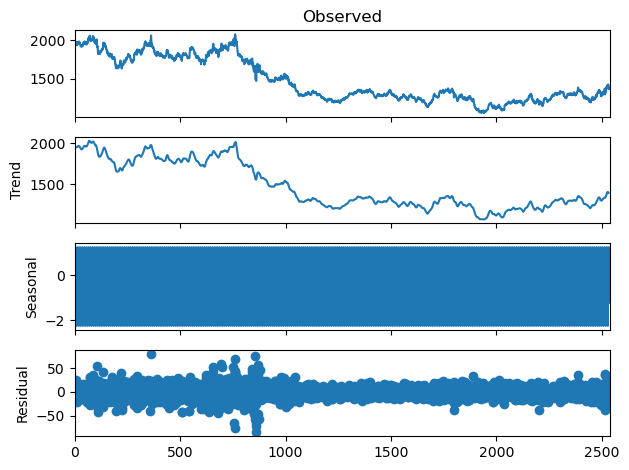

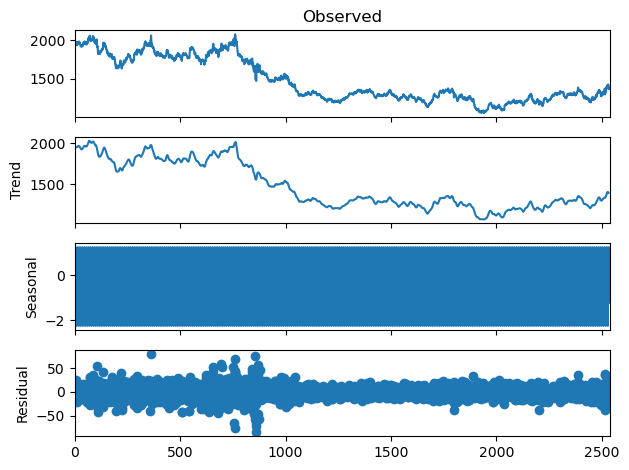

In [9]:
ts=seasonal_decompose(np.array(df["Open"]),model='Multiplicative',period=10)
ts.plot()

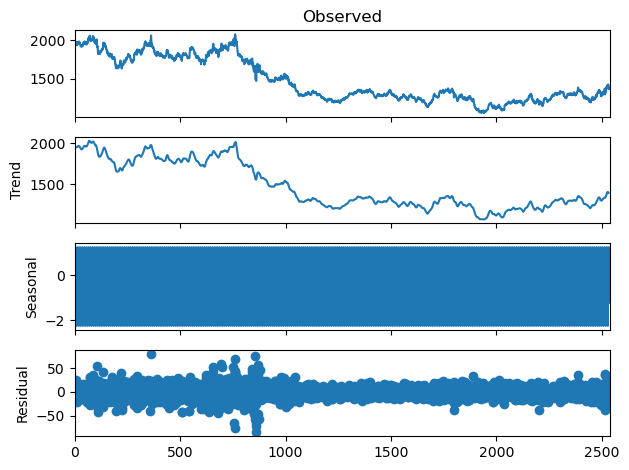

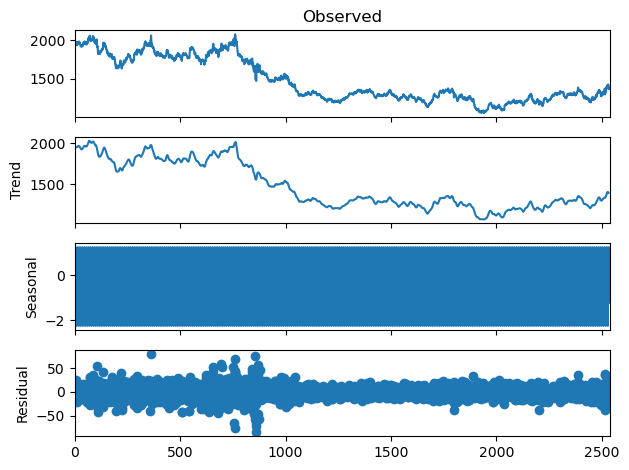

In [10]:
ts=seasonal_decompose(np.array(df["Open"]),model='Additive',period=10)
ts.plot()

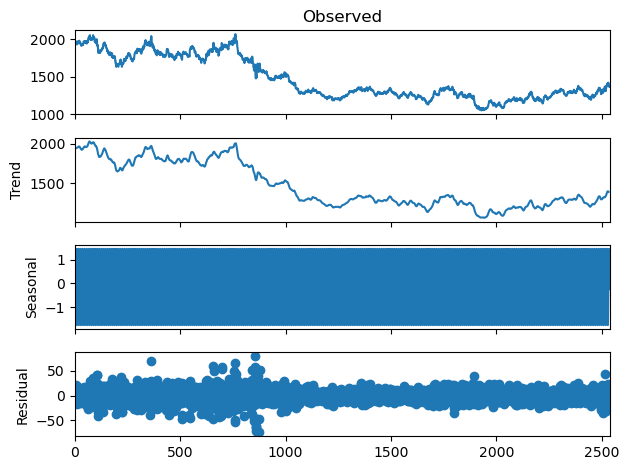

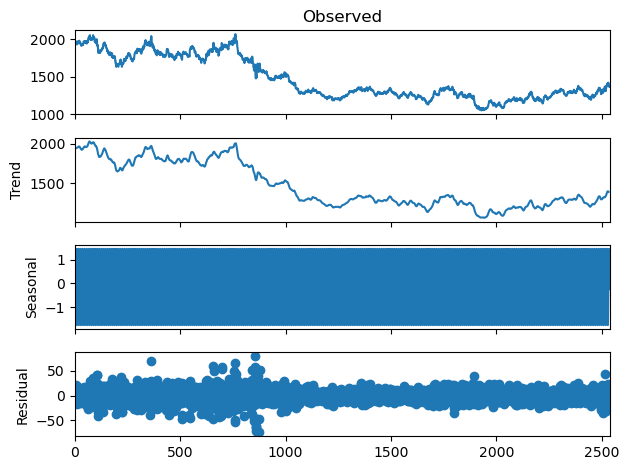

In [11]:
ts=seasonal_decompose(np.array(df["Close/Last"]),model='Multiplicative',period=10)
ts.plot()

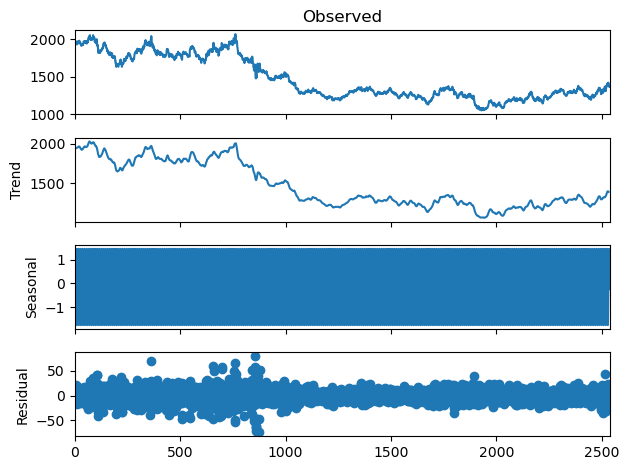

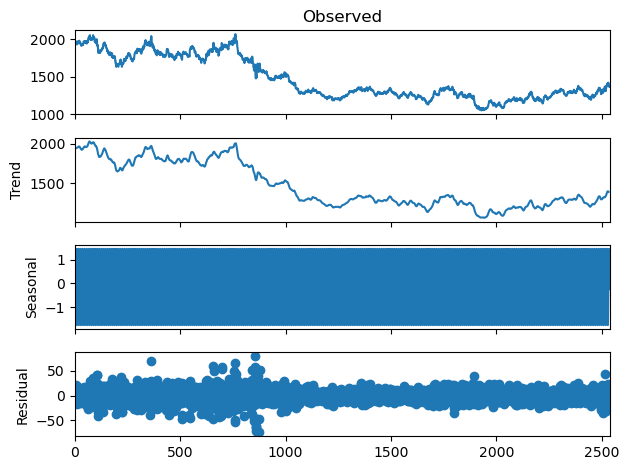

In [12]:
ts=seasonal_decompose(np.array(df["Close/Last"]),model='Additive',period=10)
ts.plot()

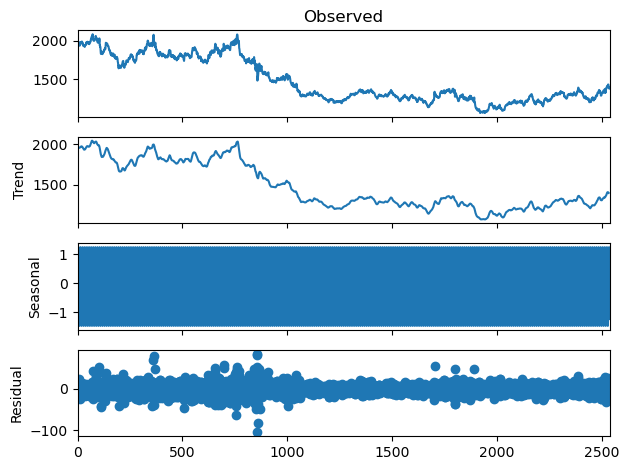

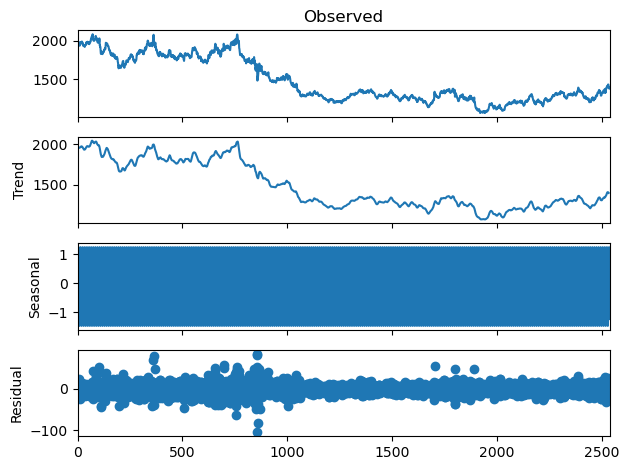

In [13]:
ts=seasonal_decompose(np.array(df["High"]),model='Multiplicative',period=10)
ts.plot()

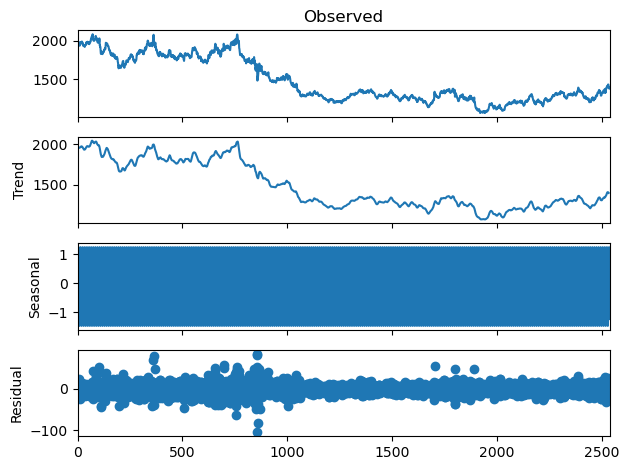

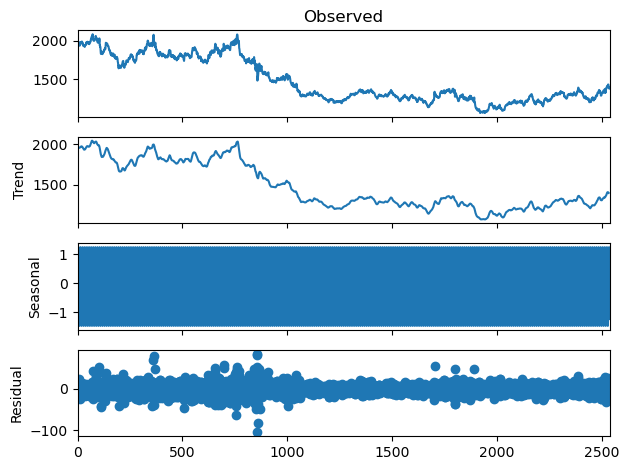

In [14]:
ts=seasonal_decompose(np.array(df["High"]),model='Additive',period=10)
ts.plot()

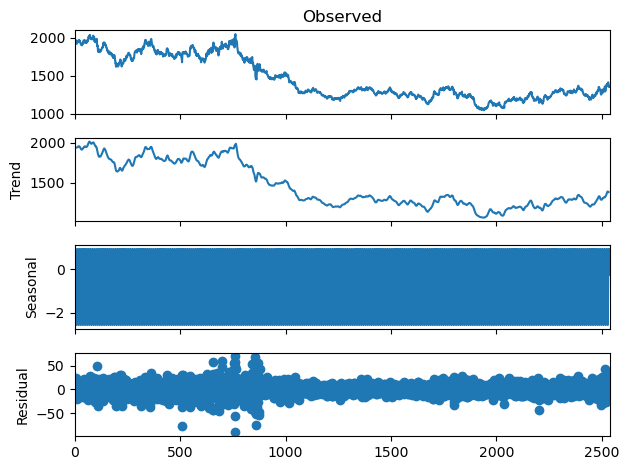

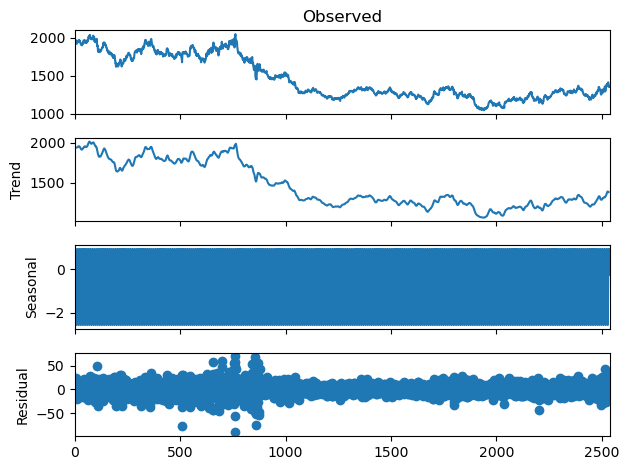

In [15]:
ts=seasonal_decompose(np.array(df["Low"]),model='Additive',period=10)
ts.plot()

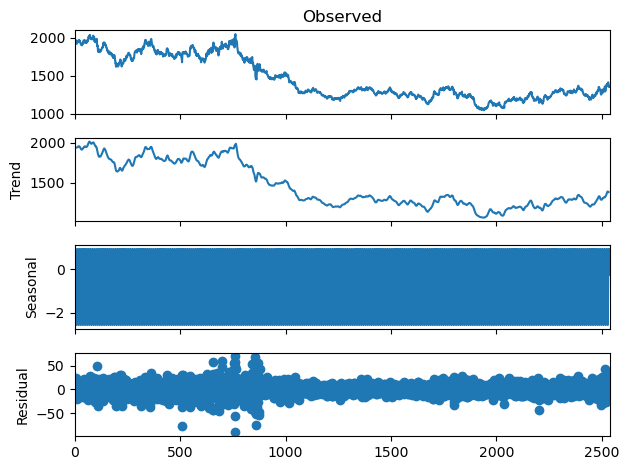

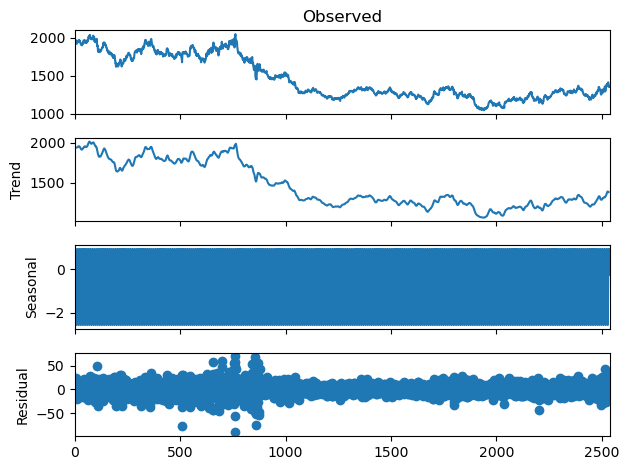

In [16]:
ts=seasonal_decompose(np.array(df["Low"]),model='Multiplicative',period=10)
ts.plot()

In [17]:
df['MA_10']=df['Close/Last'].rolling(window=10).mean()
df['MA_50']=df['Close/Last'].rolling(window=50).mean()
df['MA_200']=df['Close/Last'].rolling(window=200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

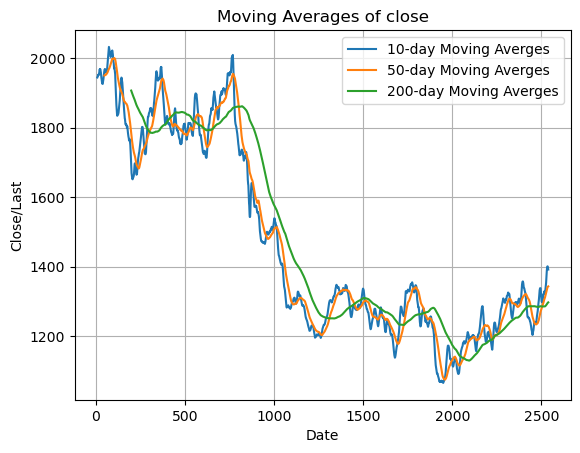

In [18]:
plt.plot(df.index,df["MA_10"],label='10-day Moving Averges')
plt.plot(df.index,df["MA_50"],label='50-day Moving Averges')
plt.plot(df.index,df["MA_200"],label='200-day Moving Averges')

plt.title('Moving Averages of close')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.legend()
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

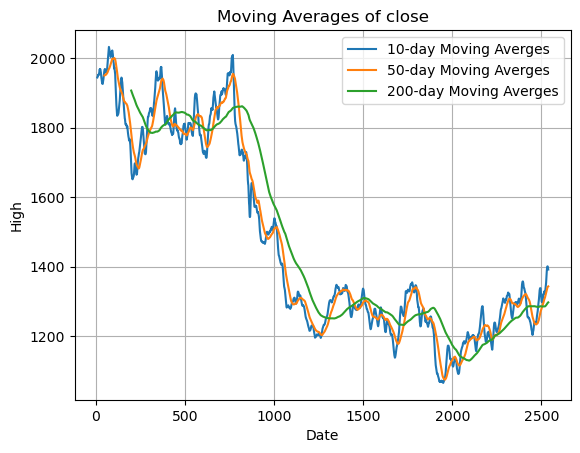

In [19]:
plt.plot(df.index,df["MA_10"],label='10-day Moving Averges')
plt.plot(df.index,df["MA_50"],label='50-day Moving Averges')
plt.plot(df.index,df["MA_200"],label='200-day Moving Averges')

plt.title('Moving Averages of close')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.grid(True)
plt.show


In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
#FIRST VALUE IS TEST STATISTIC AND SECOND VALUE IS P VALUE
adfuller(df['Open'])

(-1.774932633413752,
 0.3929760289541603,
 5,
 2533,
 {'1%': -3.432934263444484,
  '5%': -2.8626817204012203,
  '10%': -2.5673777808771043},
 20632.003608343046)

In [22]:
adfuller(df['Close/Last'])

(-1.7457129988984792,
 0.4077268563861066,
 1,
 2537,
 {'1%': -3.4329301847920486,
  '5%': -2.862679919243664,
  '10%': -2.5673768219208686},
 20582.118539767464)

In [23]:
adfuller(df['High'])

(-1.759042486945088,
 0.40097705407627604,
 1,
 2537,
 {'1%': -3.4329301847920486,
  '5%': -2.862679919243664,
  '10%': -2.5673768219208686},
 20232.68016062679)

In [24]:
adfuller(df['Low'])

(-1.7760087876962756,
 0.39243602093837404,
 17,
 2521,
 {'1%': -3.432946577138947,
  '5%': -2.8626871581881708,
  '10%': -2.5673806760176046},
 20240.866043042657)

In [25]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [26]:
np.random.seed(0)
time = np.arange(1, 101)
non_stationary_data = 0.5 * time + np.random.normal(0, 0.2, 100)

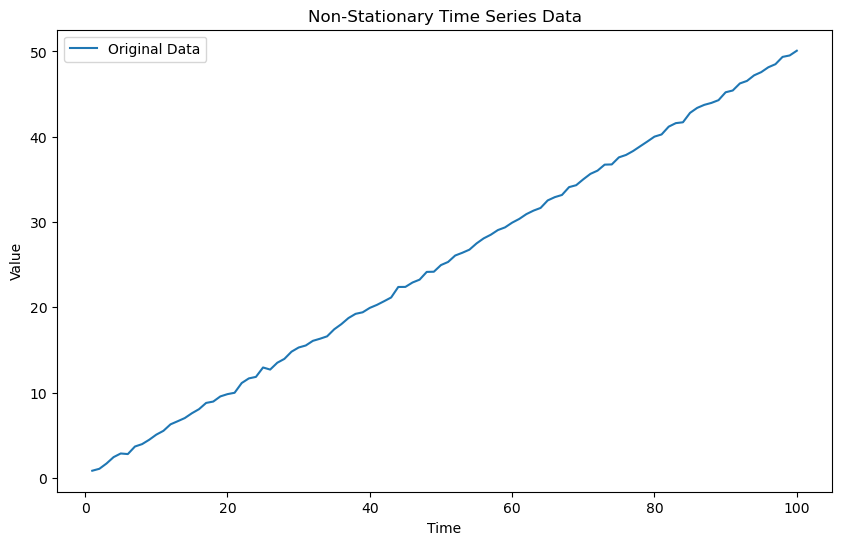

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(time, non_stationary_data, label='Original Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Non-Stationary Time Series Data')
plt.legend()
plt.show()

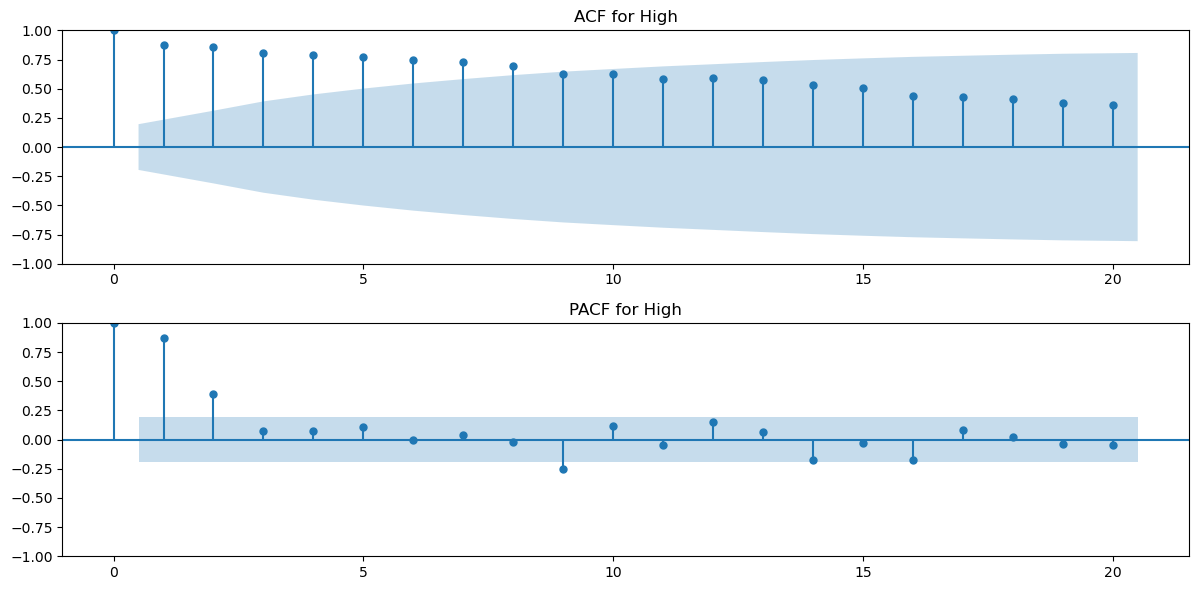

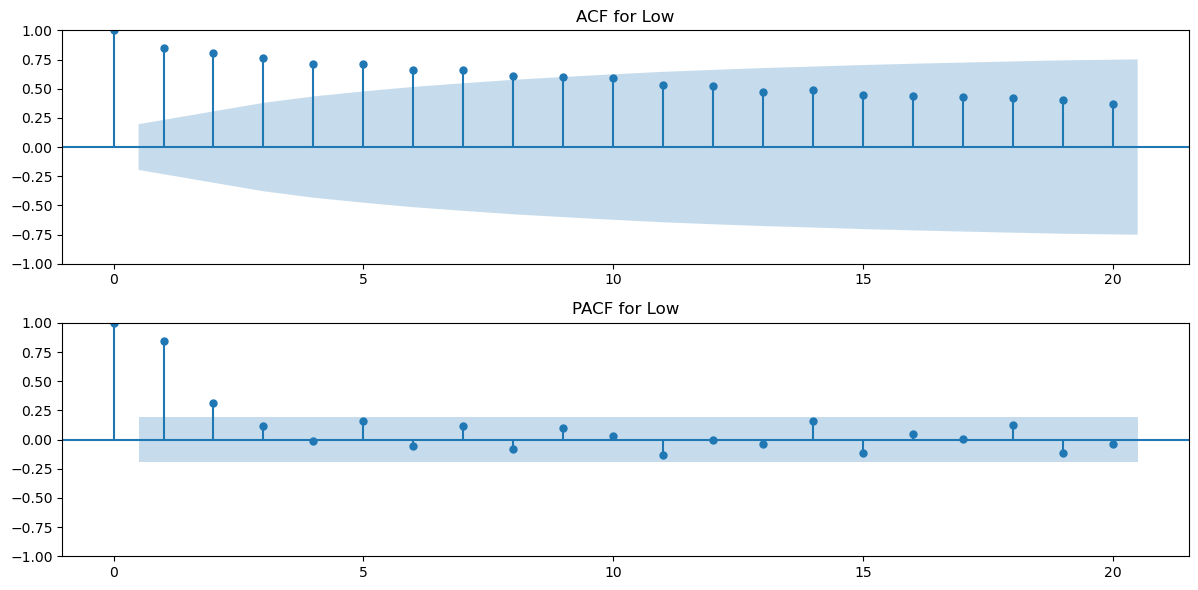

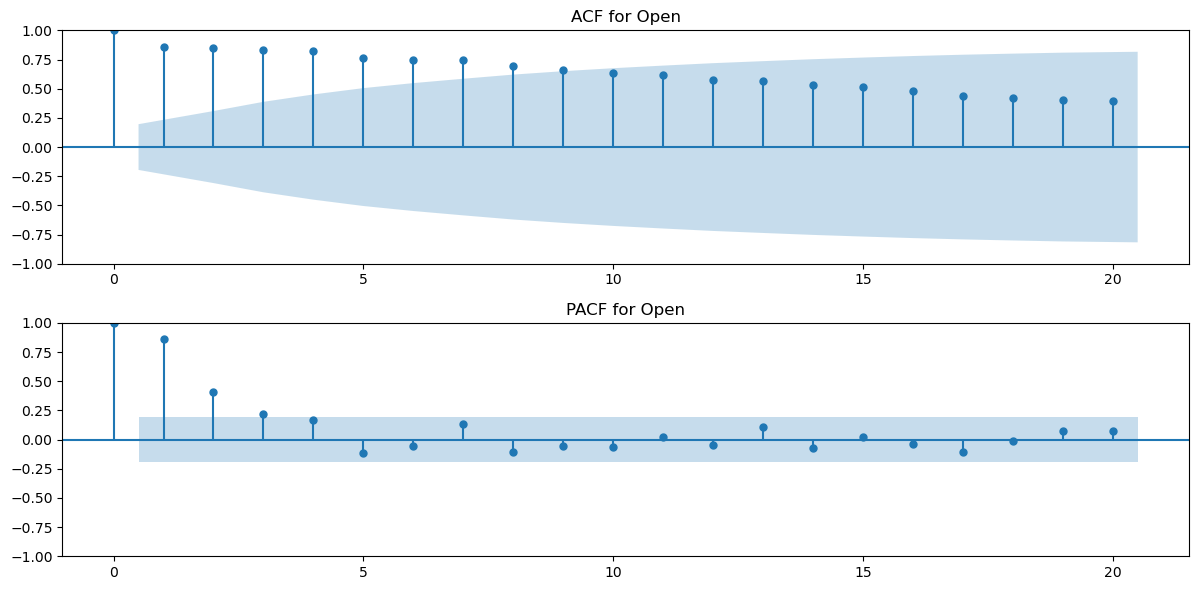

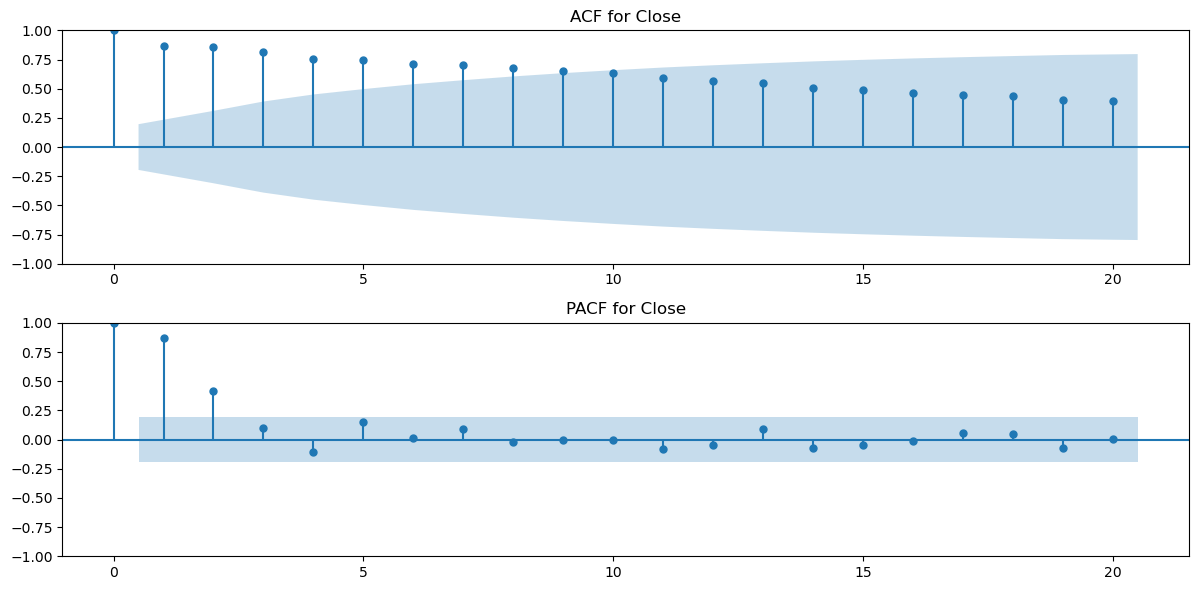

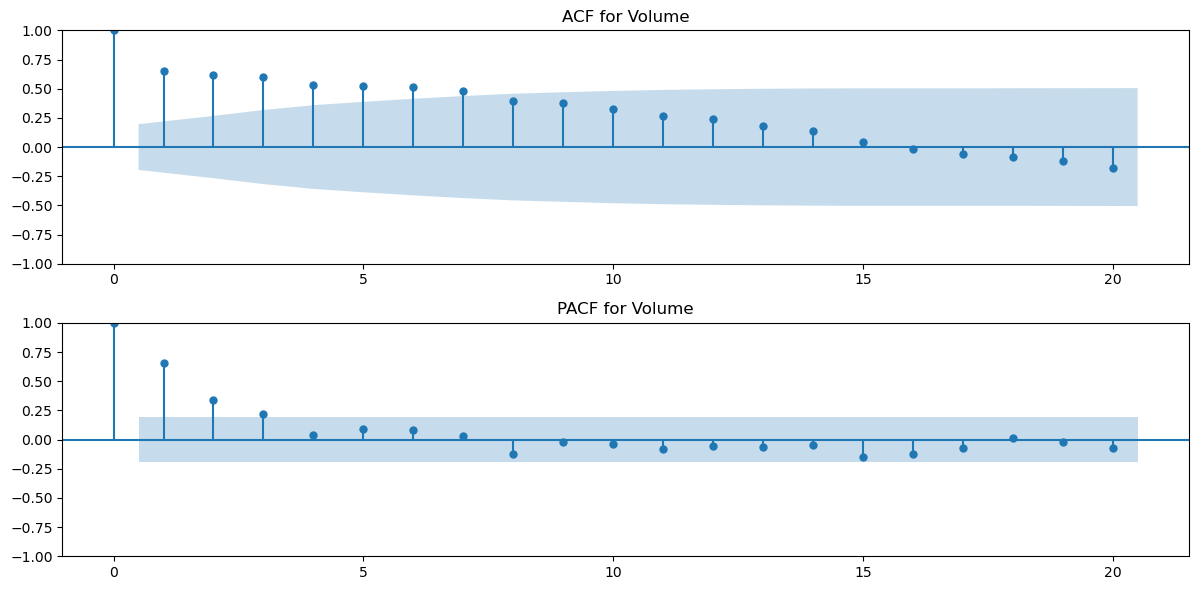

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate example time series data
np.random.seed(0)
time = np.arange(1, 101)
high = 100 + 0.5 * time + np.random.normal(0, 5, 100)
low = 80 + 0.3 * time + np.random.normal(0, 3, 100)
open_price = 90 + 0.4 * time + np.random.normal(0, 4, 100)
close = 95 + 0.4 * time + np.random.normal(0, 4, 100)
volume = 1000 + 100 * np.sin(0.1 * time) + np.random.normal(0, 50, 100)

# Create a DataFrame
data = pd.DataFrame({
    'High': high,
    'Low': low,
    'Open': open_price,
    'Close': close,
    'Volume': volume
})

# Plot ACF and PACF for each column
for column in data.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(data[column], lags=20, ax=plt.gca(), title=f'ACF for {column}')
    plt.subplot(2, 1, 2)
    plot_pacf(data[column], lags=20, ax=plt.gca(), title=f'PACF for {column}')
    plt.tight_layout()
    plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
df

,Date,Close/Last,Volume,Open,High,Low,MA_10,MA_50,MA_200
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2,NaN,NaN,NaN
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0,NaN,NaN,NaN
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5,NaN,NaN,NaN
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2,NaN,NaN,NaN
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2534,08/23/2013,1395.8,149116.0,1376.1,1399.9,1367.8,1400.80,1340.930,1295.0895
2535,08/22/2013,1370.8,134493.0,1365.6,1381.4,1354.5,1400.58,1341.872,1295.6580
2536,08/21/2013,1370.1,137350.0,1371.0,1378.9,1359.2,1398.59,1342.288,1296.2100
2537,08/20/2013,1372.6,130096.0,1364.9,1378.0,1351.6,1394.65,1342.830,1296.7445


In [31]:
df.index

RangeIndex(start=0, stop=2539, step=1)

In [33]:
model_fit=ARIMA(df["Close/Last"],order=(1,1,1)).fit()

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close/Last   No. Observations:                 2539
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10398.204
Date:                Thu, 14 Sep 2023   AIC                          20802.407
Time:                        13:48:19   BIC                          20819.924
Sample:                             0   HQIC                         20808.762
                               - 2539                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0849      0.270      0.314      0.754      -0.445       0.615
ma.L1         -0.1354      0.269     -0.503      0.615      -0.663       0.393
sigma2       211.8836      3.166     66.921      0.000     205.678     218.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3013.64
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
predictions=model_fit.predict()
future = model_fit.predict(100,150)

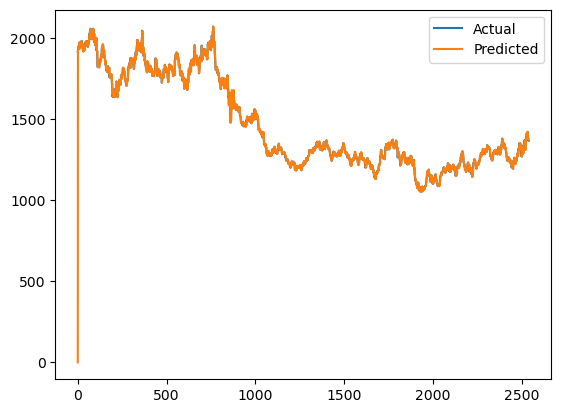

In [36]:
import matplotlib.pyplot as plt
plt.plot(df["Close/Last"],label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.show()

In [37]:
model_fit=ARIMA(df["Volume"],order=(1,1,1)).fit()

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 2539
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32038.461
Date:                Thu, 14 Sep 2023   AIC                          64082.922
Time:                        13:51:02   BIC                          64100.439
Sample:                             0   HQIC                         64089.277
                               - 2539                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1948      0.015     12.718      0.000       0.165       0.225
ma.L1         -0.9383      0.006   -151.335      0.000      -0.950      -0.926
sigma2      8.014e+09   8.41e-14   9.53e+22      0.000    8.01e+09    8.01e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):              2337.59
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.16e+40. Standard errors may be unstable.
"""

In [39]:
predictions=model_fit.predict()
future = model_fit.predict(100,150)

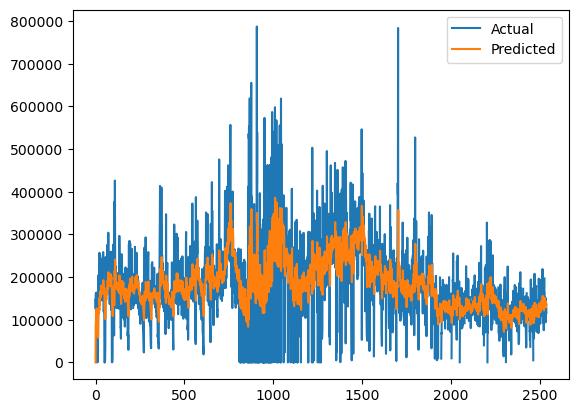

In [40]:
import matplotlib.pyplot as plt
plt.plot(df["Volume"],label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.show()

In [41]:
model_fit=ARIMA(df["High"],order=(1,1,1)).fit()

In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 2539
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10221.636
Date:                Thu, 14 Sep 2023   AIC                          20449.271
Time:                        13:52:33   BIC                          20466.788
Sample:                             0   HQIC                         20455.626
                               - 2539                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2132      0.260     -0.820      0.412      -0.723       0.296
ma.L1          0.2630      0.257      1.022      0.307      -0.241       0.767
sigma2       184.3645      2.517     73.250      0.000     179.431     189.297
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4556.92
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
predictions=model_fit.predict()
future = model_fit.predict(100,150)

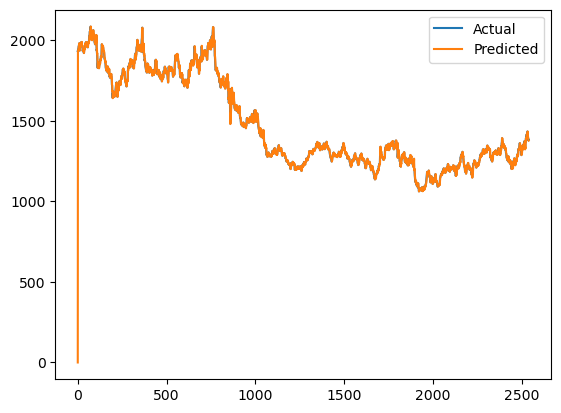

In [44]:
import matplotlib.pyplot as plt
plt.plot(df["High"],label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.show()

In [46]:
model_fit=ARIMA(df["Low"],order=(1,1,1)).fit()

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                 2539
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10228.112
Date:                Thu, 14 Sep 2023   AIC                          20462.224
Time:                        13:58:06   BIC                          20479.742
Sample:                             0   HQIC                         20468.579
                               - 2539                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0884      0.574     -0.154      0.877      -1.213       1.036
ma.L1          0.1121      0.570      0.197      0.844      -1.005       1.229
sigma2       185.3177      2.208     83.944      0.000     180.991     189.645
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9437.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
predictions=model_fit.predict()
future = model_fit.predict(100,150)

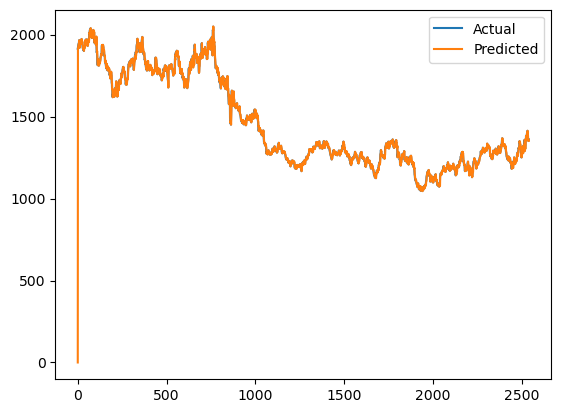

In [49]:
import matplotlib.pyplot as plt
plt.plot(df["Low"],label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.show()

In [50]:
model_fit=ARIMA(df["Open"],order=(1,1,1)).fit()

In [51]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2539
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10425.805
Date:                Thu, 14 Sep 2023   AIC                          20857.610
Time:                        13:58:09   BIC                          20875.127
Sample:                             0   HQIC                         20863.965
                               - 2539                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6557      0.157      4.168      0.000       0.347       0.964
ma.L1         -0.6951      0.150     -4.634      0.000      -0.989      -0.401
sigma2       216.5583      3.031     71.436      0.000     210.617     222.500
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4124.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
predictions=model_fit.predict()
future = model_fit.predict(100,150)

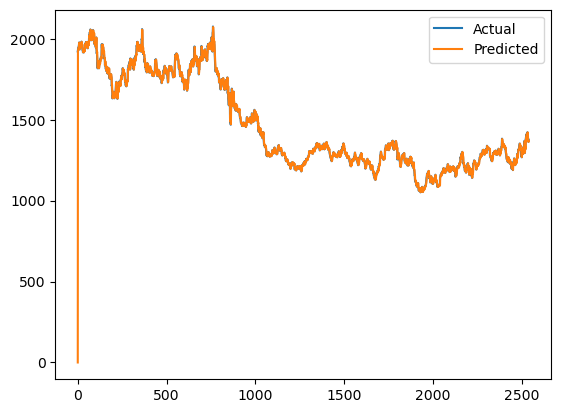

In [53]:
import matplotlib.pyplot as plt
plt.plot(df["Open"],label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.show()